In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [3]:
directory = "C:\\Users\\stefy\\OneDrive - University of Waterloo\Work Term Report 3 - Parking\\Datasets\\Toronto\\TTS Trips\\"
fileName_byTIme = "rows_ZONES - cols_START_TIME.csv"

TTS_startTime = pd.read_csv(directory+fileName_byTIme, skiprows=18)
TTS_startTime.head()

,gta06_dest,start_time,total
0,1,700,21
1,1,720,21
2,1,745,38
3,1,805,8
4,1,825,17


In [4]:
trips_byZone = TTS_startTime.groupby("gta06_dest").sum().drop('start_time', axis=1)
trips_byZone.head()

,total
gta06_dest,
1,1789
2,424
3,2097
4,1409
5,1468


In [5]:
trips_byZone.to_excel(directory+'Trips_by_Zone.xlsx')

In [6]:
def get_time(x):
    x= str(x)
    minutes = x[-2:]
    hour = x[0:-2]
    return hour+":"+minutes
get_time(1625)

'16:25'

In [7]:
TTS_startTime["start-time"]= TTS_startTime["start_time"].apply(get_time)
TTS_startTime["start-time"].head()

0    7:00
1    7:20
2    7:45
3    8:05
4    8:25
Name: start-time, dtype: object

In [8]:
TTS_startTime["hour"] = TTS_startTime["start-time"].apply(lambda x: int(x.split(":")[0]))
TTS_startTime["minutes"] = TTS_startTime["start-time"].apply(lambda x: int(x.split(":")[-1]))

In [9]:
TTS_time = TTS_startTime[TTS_startTime['hour']<24]

In [10]:
TTS_time['time']= pd.to_datetime(TTS_time['start-time'], format='%H:%M').dt.time

<ipython-input-10-75267834ca35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTS_time['time']= pd.to_datetime(TTS_time['start-time'], format='%H:%M').dt.time


In [11]:
TTS_time.head()

,gta06_dest,start_time,total,start-time,hour,minutes,time
0,1,700,21,7:00,7,0,07:00:00
1,1,720,21,7:20,7,20,07:20:00
2,1,745,38,7:45,7,45,07:45:00
3,1,805,8,8:05,8,5,08:05:00
4,1,825,17,8:25,8,25,08:25:00


In [12]:
TTS_time['dummy']=1

<ipython-input-12-90c8b4469615>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTS_time['dummy']=1


In [13]:
counts_by_time = TTS_time.groupby(['hour', as_index=False).sum()
counts_by_time

,hour,gta06_dest,start_time,total,minutes,dummy
0,4,62367,86974,4898,4574,206
1,5,173420,302335,15200,14835,575
2,6,480069,981616,54352,40816,1568
3,7,970326,2273375,131309,83075,3129
4,8,1311723,3380582,216979,102982,4097
5,9,834040,2409981,103848,55581,2616
6,10,790512,2501661,90803,53661,2448
7,11,858700,2966456,93656,60256,2642
8,12,802512,2991979,86026,53179,2449
9,13,765369,3116376,85560,50976,2358


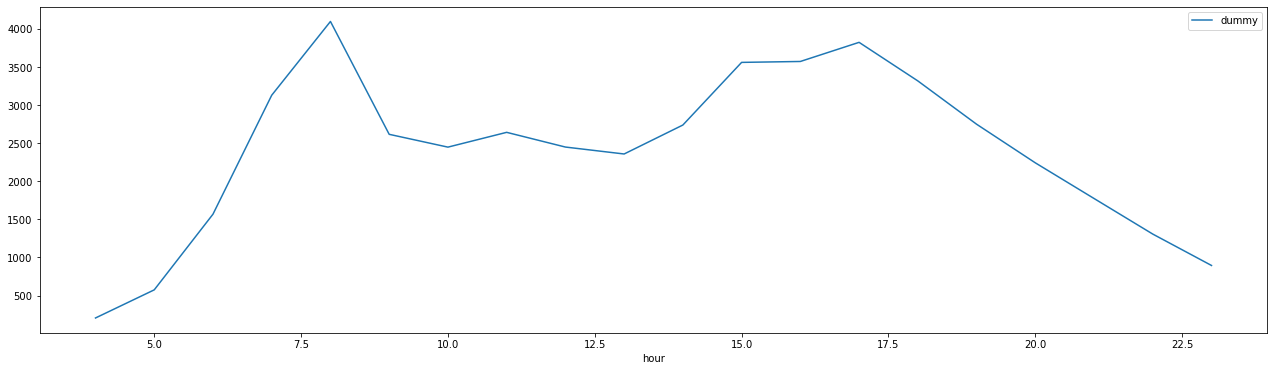

In [14]:
counts_by_time.plot(x='hour',y='dummy',figsize=(22,6))
plt.show()

<AxesSubplot:xlabel='hour', ylabel='count'>

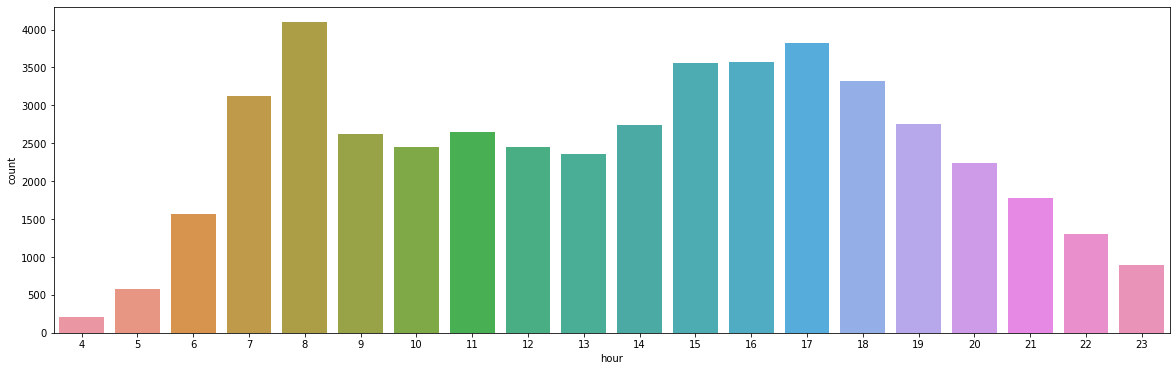

In [15]:
plt.figure(figsize=(20,6))
sns.countplot(x='hour', data=TTS_time)

Read Parking Tickets File and Join them by Hour to TTS trips

In [18]:
tickets2012_dir = "C:\\Users\\stefy\\OneDrive - University of Waterloo\\Work Term Report 3 - Parking\\Datasets\\Toronto\\Adam's parking tickets 2012\\"
tickets2012_file = "total_geocoded_records_2012_joined_TTSzone_of_interest.csv"
tickets2012 = pd.read_csv(tickets2012_dir+tickets2012_file)

In [26]:
def get_hour(x):
    if str(x)[0].isdigit()==False:
        x=-1

    x= int(x)
    x = str(int(x))
    hour=0
    min=0
    if len(x)==1:
        min=x
    if len(x)==2:
        min=x
    if len(x)==3:
        hour=x[0]
        min = x[1:]
    if len(x)==4:
        hour=x[0:2]
        min=x[2:]
    if int(min)>60 or int(hour)>24:
        
        print('error in interpretation')
        print('hour is '+str(hour)+' and minutes is '+ str(min))
        hour=-1
    return int(hour) 

In [43]:
tickets2012.head()

,x,y,Rcode,Prescode,Geocode Method,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,...,province,Ticket_Data_Original_municipality,gta06,NUMPOINTS,hour,year,month,day,formatted_date,day_name
0,-79.392354,43.650181,115010101,10,GeoPinPoint,***89654,20120722,384,STOP VEH OTR THN BCYCL-BYCL LN,60,...,ON,Toronto,67,11840,17,2012,7,22,2012-07-22,Sunday
1,-79.378374,43.656802,111010101,10,GeoPinPoint,***51221,20120612,9,STOP HWY PROHIBITED TIME/DAY,60,...,ON,Toronto,38,11877,23,2012,6,12,2012-06-12,Tuesday
2,-79.393422,43.652641,111010101,15,GeoPinPoint,***22541,20120401,210,PARK FAIL TO DISPLAY RECEIPT,30,...,ON,Toronto,67,11840,13,2012,4,1,2012-04-01,Sunday
3,-79.400032,43.652777,111010101,10,GeoPinPoint,***67490,20120228,5,PARK HWY PROHIBITED TIME/DAY,40,...,ON,Toronto,75,9766,14,2012,2,28,2012-02-28,Tuesday
4,-79.393422,43.652641,111010101,15,GeoPinPoint,***57035,20121013,29,PARK PROHIBITED TIME NO PERMIT,30,...,ON,Toronto,67,11840,0,2012,10,13,2012-10-13,Saturday


In [42]:
tickets2012['year'] = tickets2012['date_of_infraction'].apply(lambda x: int(str(x)[0:4]))
tickets2012['month'] = tickets2012['date_of_infraction'].apply(lambda x: int(str(x)[4:6]))
tickets2012['day'] = tickets2012['date_of_infraction'].apply(lambda x: int(str(x)[6:8]))

tickets2012['formatted_date'] = pd.to_datetime(tickets2012[['year','month','day']])
tickets2012['day_name'] = tickets2012['formatted_date'].dt.day_name()


In [27]:
tickets2012['hour']=tickets2012['time_of_infraction'].apply(get_hour)

In [47]:
tickets2012 = tickets2012[tickets2012['day_name']!='Saturday']
tickets2012 = tickets2012[tickets2012['day_name']!='Sunday']
tickets2012['day_name'].unique()

array(['Tuesday', 'Thursday', 'Monday', 'Friday', 'Wednesday'],
      dtype=object)

In [126]:
tickets2012['tickets_count']=1
hourly_tickets = tickets2012.groupby(['gta06','hour'],as_index=False).sum()
hourly_tickets

,gta06,hour,x,y,Rcode,Prescode,date_of_infraction,infraction_code,set_fine_amount,time_of_infraction,NUMPOINTS,year,month,day,tickets_count
0,30,10,-79.369123,43.643794,111010101,10,20121031,3,30,1041.0,2,2012,10,31,1
1,30,15,-79.370461,43.643338,111010101,10,20120322,3,30,1525.0,2,2012,3,22,1
2,31,20,-79.370468,43.643534,111010101,10,20120913,3,30,2056.0,1,2012,9,13,1
3,32,0,-158.746330,87.289670,230020202,30,40241524,507,210,34.0,584,4024,15,24,2
4,32,7,-79.373528,43.643584,115010101,10,20120215,30,60,720.0,292,2012,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,80,19,-635.183028,349.096863,920080808,120,160965446,2436,315,15367.0,11936,16096,53,146,8
650,80,20,-396.989290,218.183464,575050505,70,100602627,231,200,10199.0,7460,10060,26,27,5
651,80,21,-238.193533,130.909248,345030303,40,60361246,11,100,6376.0,4476,6036,12,46,3
652,80,22,-79.397776,43.635032,115010101,10,20120712,4,30,2246.0,1492,2012,7,12,1


In [127]:
hourly_tickets = hourly_tickets.drop(['Rcode','Prescode','date_of_infraction','infraction_code','time_of_infraction','x','y','year','month','day'], axis=1)

In [128]:
hourly_tickets

,gta06,hour,set_fine_amount,NUMPOINTS,tickets_count
0,30,10,30,2,1
1,30,15,30,2,1
2,31,20,30,1,1
3,32,0,210,584,2
4,32,7,60,292,1
...,...,...,...,...,...
649,80,19,315,11936,8
650,80,20,200,7460,5
651,80,21,100,4476,3
652,80,22,30,1492,1


In [129]:
counts_by_time_and_zone = TTS_time.groupby(['gta06_dest','hour'], as_index=False).sum()
counts_by_time_and_zone['gta06']=counts_by_time_and_zone['gta06_dest']
counts_by_time_and_zone = counts_by_time_and_zone.rename(columns={'total':'trips_to_zone'}) 
counts_by_time_and_zone

,gta06_dest,hour,start_time,trips_to_zone,minutes,dummy,gta06
0,1,7,2165,80,65,3,1
1,1,8,3320,79,120,4,1
2,1,9,3650,122,50,4,1
3,1,10,5135,105,135,5,1
4,1,11,5645,116,145,5,1
...,...,...,...,...,...,...,...
10903,625,16,1600,23,0,1,625
10904,625,17,3430,80,30,2,625
10905,625,18,1800,8,0,1,625
10906,625,19,3820,26,20,2,625


In [130]:
zones_of_interest = hourly_tickets['gta06'].unique()
zones_of_interest

array([30, 31, 32, 33, 34, 35, 36, 37, 38, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 75, 76, 77, 78, 80],
      dtype=int64)

In [131]:
counts_by_time_and_zone = counts_by_time_and_zone[counts_by_time_and_zone['gta06'].apply(lambda x: x in zones_of_interest)]

In [132]:
merged_TTS_tickets = pd.merge(hourly_tickets,counts_by_time_and_zone,how='outer', on=['gta06','hour']).drop(['minutes','dummy','start_time','gta06_dest'],axis=1)

In [133]:
merged_TTS_tickets

,gta06,hour,set_fine_amount,NUMPOINTS,tickets_count,trips_to_zone
0,30,10,30.0,2.0,1.0,NaN
1,30,15,30.0,2.0,1.0,NaN
2,31,20,30.0,1.0,1.0,34.0
3,32,0,210.0,584.0,2.0,NaN
4,32,7,60.0,292.0,1.0,216.0
...,...,...,...,...,...,...
716,63,5,NaN,NaN,NaN,63.0
717,64,4,NaN,NaN,NaN,22.0
718,64,5,NaN,NaN,NaN,12.0
719,65,4,NaN,NaN,NaN,11.0


In [144]:
for index,row in merged_TTS_tickets.sort_values(by=['gta06','hour']).iterrows():
    print("Zone "+str(row['gta06'])+", Hour: "+str(row['hour'])+", Tickets: "+str(row['tickets_count'])+", Trips: "+str(row['trips_to_zone']))

47.0
Zone 54, Hour: 20, Tickets: 232.0, Trips: 28.0
Zone 54, Hour: 21, Tickets: 77.0, Trips: nan
Zone 54, Hour: 22, Tickets: 58.0, Trips: nan
Zone 54, Hour: 23, Tickets: 44.0, Trips: 13.0
Zone 55, Hour: 0, Tickets: 19.0, Trips: nan
Zone 55, Hour: 1, Tickets: 12.0, Trips: nan
Zone 55, Hour: 2, Tickets: 3.0, Trips: nan
Zone 55, Hour: 3, Tickets: 6.0, Trips: nan
Zone 55, Hour: 4, Tickets: 3.0, Trips: 101.0
Zone 55, Hour: 5, Tickets: 4.0, Trips: 115.0
Zone 55, Hour: 6, Tickets: 49.0, Trips: 563.0
Zone 55, Hour: 7, Tickets: 373.0, Trips: 1156.0
Zone 55, Hour: 8, Tickets: 380.0, Trips: 1647.0
Zone 55, Hour: 9, Tickets: 1643.0, Trips: 534.0
Zone 55, Hour: 10, Tickets: 2152.0, Trips: 145.0
Zone 55, Hour: 11, Tickets: 2017.0, Trips: 86.0
Zone 55, Hour: 12, Tickets: 1788.0, Trips: 25.0
Zone 55, Hour: 13, Tickets: 1320.0, Trips: 164.0
Zone 55, Hour: 14, Tickets: 928.0, Trips: 146.0
Zone 55, Hour: 15, Tickets: 757.0, Trips: 68.0
Zone 55, Hour: 16, Tickets: 406.0, Trips: 92.0
Zone 55, Hour: 17, Tic